In [2]:
from datasets.datasets import BaseDataset
from torchvision import transforms

transformers = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64))
])

In [6]:
import numpy as np

bds = BaseDataset(
    root='data/food_data/train',
    transforms=transformers,
    samples_to_normalize=None,
    mean=None, std=None,
    normalize_data=True
)

data normalization: 100%|██████████| 98937/98937 [00:20<00:00, 4744.49it/s]

Normalization:
	mean=[0.5503347516059875, 0.4453015923500061, 0.22809578478336334]
	 std=[0.5503347516059875, 0.2311706840991974, 0.22809578478336334]


In [7]:
bds_modified = BaseDataset(
    root='data/food_data/train',
    transforms=transformers,
    samples_to_normalize=None,
    mean=np.array([0.5, 0.5, 0.5]), std=np.array([0.5, 0.5, 0.5]),
    normalize_data=True
)

In [9]:
bds[0]['images']

tensor([[[ 1.4451,  1.3743,  1.2681,  ..., -1.4570, -1.4393, -1.3862],
         [ 1.2328,  1.1974,  1.1266,  ..., -0.5191, -0.8199, -1.0500],
         [ 1.0204,  1.0204,  0.9850,  ..., -0.2537, -0.1829, -0.1652],
         ...,
         [ 1.1443,  1.2151,  1.2858,  ...,  1.4982,  1.4982,  1.4982],
         [ 1.1974,  1.2328,  1.2681,  ...,  1.5159,  1.5159,  1.5159],
         [ 1.1974,  1.1974,  1.1974,  ...,  1.5159,  1.5159,  1.5159]],

        [[ 1.6361,  1.5683,  1.4665,  ..., -1.7906, -1.8245, -1.7736],
         [ 1.4326,  1.3986,  1.3308,  ..., -0.8745, -1.1629, -1.4004],
         [ 1.2290,  1.2290,  1.1951,  ..., -0.5352, -0.4844, -0.4674],
         ...,
         [ 1.2629,  1.3308,  1.3986,  ...,  1.7379,  1.7379,  1.7379],
         [ 1.2969,  1.3308,  1.3647,  ...,  1.7549,  1.7549,  1.7549],
         [ 1.2969,  1.2969,  1.2969,  ...,  1.7549,  1.7549,  1.7549]],

        [[ 1.9023,  1.8335,  1.7304,  ..., -1.5019, -1.5019, -1.5019],
         [ 1.6960,  1.6616,  1.5928,  ..., -0

(array([ 1.,  1.,  0.,  0.,  1.,  2.,  1.,  0.,  2.,  0.,  1.,  2.,  3.,
         2.,  1.,  2.,  3.,  2.,  0.,  3.,  3.,  5.,  4.,  4., 10.,  8.,
         5.,  6.,  0.,  7.,  3.,  7.,  9.,  8., 10.,  6.,  6.,  0.,  6.,
         3.,  5.,  4.,  3.,  4.,  9.,  3.,  3.,  0.,  4.,  8., 10.,  3.,
         7.,  1., 11.,  7.,  0.,  5.,  5.,  7.,  6.,  8.,  5.,  8.,  6.,
         6.,  0.,  6.,  6.,  7.,  5.,  9., 10.,  3.,  9.,  0.,  9.,  9.,
         2., 12.,  4., 12., 10.,  7., 11.,  0.,  9., 14., 11., 10., 15.,
         8.,  7., 14.,  0., 12.,  9., 15., 11., 11.,  5., 19., 15., 16.,
         0., 15., 15., 17., 12., 12., 16., 10., 16.,  0., 18., 16., 17.,
        13., 12., 15., 16., 10., 11.,  0., 12., 12., 15., 19., 15., 13.,
        11., 11.,  0., 14., 10., 16., 14., 23., 19., 17., 15., 14.,  0.,
        11., 20., 12., 17., 25., 16., 22., 22.,  0., 27., 31., 28., 33.,
        27., 23., 23., 31., 27.,  0., 27., 22., 32., 32., 32., 26., 18.,
        38.,  0., 36., 30., 25., 20., 26., 31., 29.

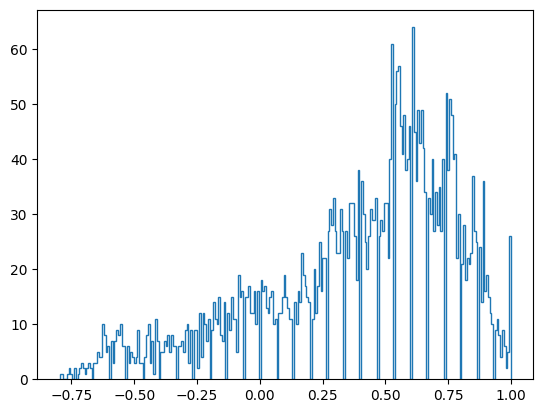

In [4]:
from matplotlib import pyplot as plt
plt.hist(bds[0]['images'][0].ravel(), bins=256, histtype='step')

In [278]:
from matplotlib import pyplot as plt
from training import noise

ns = noise.NoiseScheduler(0.1, 1000)

/var/folders/hk/5434dpv95nl2rxl497d7c0lm0000gn/T/ipykernel_19630/769216580.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.imshow(ns(bds[0]['images'].permute(1, 2, 0), 900) * bds.std + bds.mean)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.7908554e-05..1.0000212].


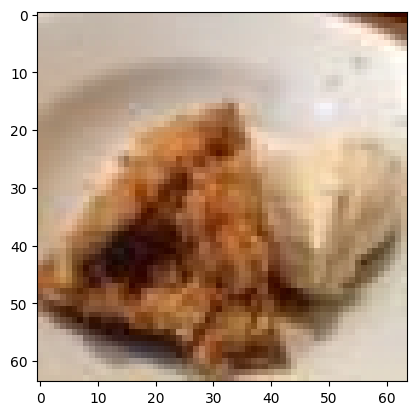

In [107]:
plt.imshow(ns(bds[0]['images'].permute(1, 2, 0), 900) * bds.std + bds.mean)

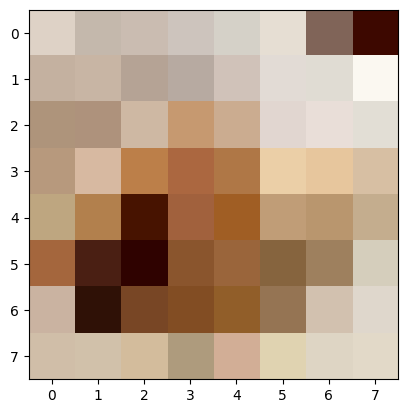

In [281]:
from torch.nn import functional as F
import torch
from math import log

input = bds[0]['images'].unsqueeze(0)
# input = ns(bds[0]['images'], 10).unsqueeze(0)
size = int(input.size(2) / (2 ** 3))
size = (size, size)

plt.imshow(ns(F.interpolate(input, size, mode='bilinear', align_corners=True), 1000).squeeze(0).permute(1, 2, 0).detach().numpy() * bds.std + bds.mean)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0074172914..1.0109874].


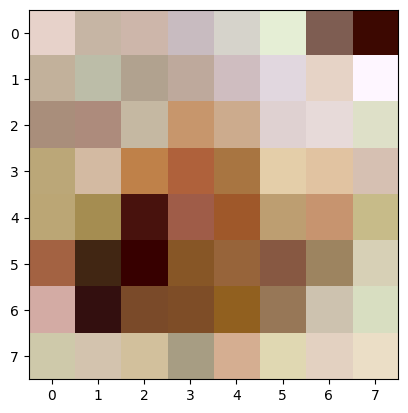

In [290]:
plt.imshow(ns(F.interpolate(input, size, mode='bilinear', align_corners=True), 1).squeeze(0).permute(1, 2, 0).detach().numpy() * bds.std + bds.mean)

In [1]:
from models.gan_models import WasserstainGenerator, WasserstainCritic
from omegaconf import OmegaConf
import torch

config = OmegaConf.create({
    'z_dim': 128,
    'hidden_dim': 512
})

wg = WasserstainGenerator(config)
wc = WasserstainCritic(config)

In [24]:
num_blocks=5
wg.set_num_blocks(num_blocks)
wc.set_num_blocks(num_blocks)
wc(wg(torch.normal(0, 1, (1, 128), device='cpu')))

tensor(0.0339, grad_fn=<SqueezeBackward0>)

In [7]:
wg.block_number

tensor(1)

In [4]:
from training.fade_in import FadeInScheduler
from omegaconf import OmegaConf
import torch

config = OmegaConf.create({
    'lvl_fraction': [0.5, 0.1, 0.1, 0.2, 0.1],
    'start_from': 1
})

fis = FadeInScheduler(300000, config)

In [6]:
from tqdm import tqdm
ks = []
for i in tqdm(range(300000)):
    _, k = fis(torch.normal(0, 1, (3, 3, 64, 64), device='cpu'), i)
    ks.append(k)

  0%|          | 0/300000 [00:00<?, ?it/s]

100%|██████████| 300000/300000 [02:24<00:00, 2079.84it/s]


(array([150000.,      0.,  30000.,      0.,      0.,  30000.,      0.,
         60000.,      0.,  30000.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

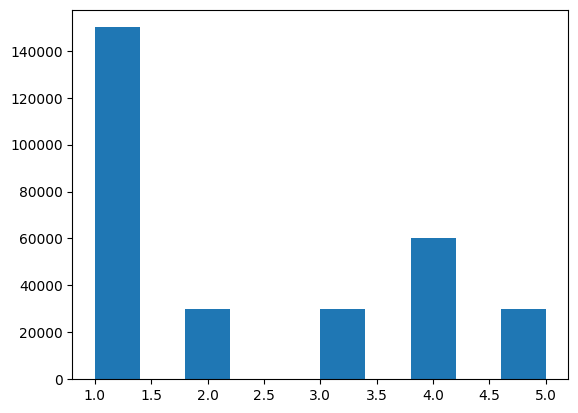

In [7]:
from matplotlib import pyplot as plt
plt.hist(ks)

In [2]:
fis(torch.normal(0, 1, (3, 3, 64, 64), device='cpu'), 0)

(tensor([[[[-1.0906,  0.4119, -0.7750,  0.4693],
           [-0.3465,  0.2120,  1.0050, -0.9589],
           [ 0.0548, -0.6221,  1.3432, -1.0137],
           [-0.5251,  0.1708, -1.0779,  0.8347]],
 
          [[ 2.0891, -0.5095,  0.2201,  0.8418],
           [-1.1826,  1.5177, -0.2353, -0.0411],
           [-0.3922,  1.2493,  1.0612, -1.1562],
           [ 0.3163, -0.3204, -1.1379, -1.0743]],
 
          [[ 0.8276,  0.6131, -0.8035,  1.0268],
           [-2.2075, -0.0541, -1.5817, -2.1291],
           [-0.6421,  2.1659,  1.1974, -0.6697],
           [ 0.5226, -0.1340, -0.2136,  0.5278]]],
 
 
         [[[ 0.1328, -1.9444,  0.7725,  1.6371],
           [ 1.8997,  2.0917, -0.5498, -0.5602],
           [-0.4596,  0.6740,  0.2972, -0.4629],
           [ 1.7110, -0.5254, -1.5955, -0.4160]],
 
          [[ 1.5743, -0.8722, -1.2473, -1.6467],
           [-1.3646, -0.0185, -0.8471,  0.2479],
           [ 0.2702,  1.2933, -0.5234, -0.5178],
           [-1.5107, -1.2274,  0.4502,  0.3784]],
 
  